# Tupac Albums

In [1]:
import nltk
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df1 = pd.read_csv('/Users/johnlee/gitfoldernew/projectfiles/2pac_data.csv')


In [3]:
df2 = pd.read_csv('/Users/johnlee/gitfoldernew/projectfiles/2pac_data2.csv')
df3 = pd.read_csv('/Users/johnlee/gitfoldernew/projectfiles/2pac_data3.csv')
df4 = pd.read_csv('/Users/johnlee/gitfoldernew/projectfiles/2pac_data4.csv')
df5 = pd.read_csv('/Users/johnlee/gitfoldernew/projectfiles/2pac_data5.csv')
df6 = pd.read_csv('/Users/johnlee/gitfoldernew/projectfiles/2pac_data6.csv')
df7 = pd.read_csv('/Users/johnlee/gitfoldernew/projectfiles/2pac_data7.csv')
df8 = pd.read_csv('/Users/johnlee/gitfoldernew/projectfiles/2pac_data8.csv')
df9 = pd.read_csv('/Users/johnlee/gitfoldernew/projectfiles/2pac_data9.csv')
df10 = pd.read_csv('/Users/johnlee/gitfoldernew/projectfiles/2pac_data10.csv')


In [4]:
df_tupac_raw = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10]) 


In [5]:
#Turning file to CSV to make EDAs on Tableau
df_tupac_raw.to_csv('df_tupac_raw.csv')

In [6]:
df_tupac_raw['posthumous'] = np.where(df_tupac_raw['year'] >= 1997, 'yes', 'no')


# Biggie Albums

In [8]:
dff1 = pd.read_csv('/Users/johnlee/gitfoldernew/projectfiles/biggie_data1.csv')
dff2 = pd.read_csv('/Users/johnlee/gitfoldernew/projectfiles/biggie_data2.csv')
dff3 = pd.read_csv('/Users/johnlee/gitfoldernew/projectfiles/biggie_data3.csv')
dff4 = pd.read_csv('/Users/johnlee/gitfoldernew/projectfiles/biggie_data4.csv')
dff5 = pd.read_csv('/Users/johnlee/gitfoldernew/projectfiles/biggie_data5.csv')


In [9]:
df_biggie_raw = pd.concat([dff1, dff2, dff3, dff4, dff5])

In [10]:
#Turning file to CSV to make EDAs on Tableau
df_biggie_raw.to_csv('df_biggie_raw.csv')

In [11]:
df_biggie_raw['posthumous'] = np.where(df_biggie_raw['year'] >= 1998, 'yes', 'no')


In [12]:
dff1.head()

,album,year,lyrics,track,artist
0,Ready to Die,1994,[Part 1: Puff Daddy]\nPush\nC'mon Shorty stay ...,Intro,Biggie
1,Ready to Die,1994,[Chorus]\nBack in the day\nThings done changed...,Things Done Changed,Biggie
2,Ready to Die,1994,"[Intro: Notorious B.I.G.]\nYeah, mothafuckas b...",Gimme the Loot,Biggie
3,Ready to Die,1994,"[Produced by Easy Mo Bee]\n\n[Intro]\nDamn, is...",Machine Gun Funk,Biggie
4,Ready to Die,1994,[Produced by Easy Mo Bee]\n\n[Notorious B.I.G....,Warning,Biggie


# Reset Index

In [47]:
# df_all = pd.concat([df_tupac,df_biggie])

In [48]:
df_tupac_raw.reset_index(inplace=True)
df_biggie_raw.reset_index(inplace=True)


In [49]:
#Pickling Dataframe
import pickle

pickle.dump(df_tupac_raw, open( "df_tupac_raw", "wb" ) )
pickle.dump(df_biggie_raw, open( "df_biggie_raw", "wb" ) )

In [50]:
#Using this as an example in my powerpoint to show that this 'track' would skew

sample = df_biggie_raw['lyrics'][46]
sample = [re.sub('\n',' ', sample)]


In [51]:
sample

["(Puffy background) What about ten years from now?  (Biggie) Ten years from now, where do I want to be? I wanna be...just livin' man, just Living comfortably with my niggas man, in a pool and shit, smoking plenty indo You know I'm saying? I got my wife, just lounging with my wife you know i'm Saying? With my daughter, her daughter, you know just laid back, just chillin You know i'm saying? Living all my niggas is living where I think I be? Ten Years I don't think I will see it for real dogg for real man, that shit ain't Promised man I don't think my luck is that good, I hope it is but if it ain't, so be it, I'm Ready (your dead wrong)  (B.I.G.chant) (Repeat til fade out) The weak or the strong You got it going on Your dead wrong...."]

In [52]:
df_tupac_raw.loc[46]

index                                                         2
album                                            All Eyez on Me
year                                                       1996
lyrics        [Intro: 2Pac & Nate Dogg]\nHey Nate, you know ...
track                                                Skandalouz
artist                                                     2pac
posthumous                                                   no
Name: 46, dtype: object

# Tokenization

In [55]:
from nltk.tokenize import word_tokenize

In [56]:
df_tupac_raw.dtypes

index          int64
album         object
year           int64
lyrics        object
track         object
artist        object
posthumous    object
dtype: object

# Dropping Interludes & Tracks without lyrics

In [68]:
# df_biggie = df_biggie.drop(df_biggie.index[0])
df_biggie = df_biggie_raw.drop(index=[0, 7, 19, 20, 21, 29, 45, 46, 60, 63, 
                                      64, 70, 80, 84, 88, 91, 95, 97, 99, 101, 107])


In [69]:
#Resetting Index
df_biggie.reset_index(inplace=True)

In [70]:
df_tupac = df_tupac_raw.drop(index=[14, 16, 29, 84, 108, 125, 139, 165])


In [71]:
#Resetting Index

df_tupac.reset_index(inplace=True)

In [72]:
#How many total songs on Biggie Albums

total_biggie_songs = len(df_biggie_raw['track'])
total_biggie_songs


111

In [73]:
#How many songs are usable?

num_biggie_songs = len(df_biggie['track'])
num_biggie_songs

90

In [140]:
#How many total songs on Biggie Albums

total_tupac_songs = len(df_tupac_raw['track'])
total_tupac_songs

198

In [142]:
#How many songs are usable?

num_tupac_songs = len(df_tupac['track'])
num_tupac_songs

190

['Biggie', 'Tupac']


In [144]:
rappers = ['Biggie', 'Tupac']
total_songs = np.array([total_biggie_songs , total_tupac_songs])

No handles with labels found to put in legend.
/Users/johnlee/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


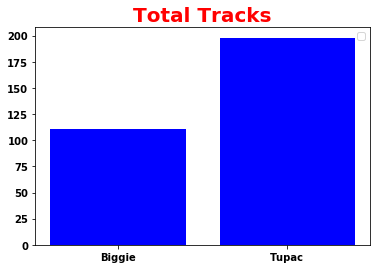

In [220]:
plt.bar(rappers, total_songs, color = 'blue', width = 0.8)
plt.xticks(rappers, weight = 'bold')
plt.yticks(weight = 'bold')
plt.ylabel("", weight = 'bold')
plt.xlabel("")
plt.legend(loc="")
plt.title("Total Tracks", fontsize = 20,weight='bold',color='Red')

plt.show()

/Users/johnlee/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


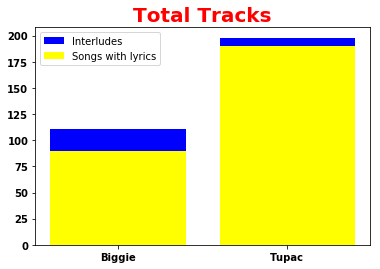

In [221]:
rappers = ['Biggie', 'Tupac']
total_songs = np.array([total_biggie_songs , total_tupac_songs])
usable_songs = np.array([num_biggie_songs , num_tupac_songs])

plt.bar(rappers, total_songs, width=0.8, label='Interludes', color='blue')
plt.bar(rappers, usable_songs, width=0.8, label='Songs with lyrics', color='yellow')

plt.xticks(rappers, weight = 'bold')
plt.yticks(weight = 'bold')
plt.ylabel("", weight = 'bold')
plt.xlabel("")
plt.legend(loc="")
plt.title("Total Tracks", fontsize = 20,weight='bold',color='Red')

plt.show()

,level_0,index,album,year,lyrics,track,artist,posthumous,new_lyrics,length_lyrics
0,0,0,2Pacalypse Now,1991,[Intro: 2Pac + (Ed O.G.) + Ice Cube]\n(Hard li...,Young Black Male,2pac,no,(hard like an erection) young black male (hard...,2265
1,1,1,2Pacalypse Now,1991,[Verse 1: 2Pac]\nYou know they got me trapped ...,Trapped,2pac,no,you know they got me trapped in this prison of...,3872
2,2,2,2Pacalypse Now,1991,"[Intro: 2Pac & 2Pac as ""Soulja""]\nAll you want...",Soulja's Story,2pac,no,all you wanted to be a soulja a soulja all you...,4466
3,3,3,2Pacalypse Now,1991,"[Intro: Skit]\n— What's up?\n— Yo, this scene:...",I Don't Give A Fuck,2pac,no,— whats up? — yo this scene: rollers tried to ...,4302
4,4,4,2Pacalypse Now,1991,[Verse 1]\nThey claim that I'm violent\nJust c...,Violent,2pac,no,they claim that im violent just cause i refuse...,3845


# EDA

Text(0.5, 0, '')

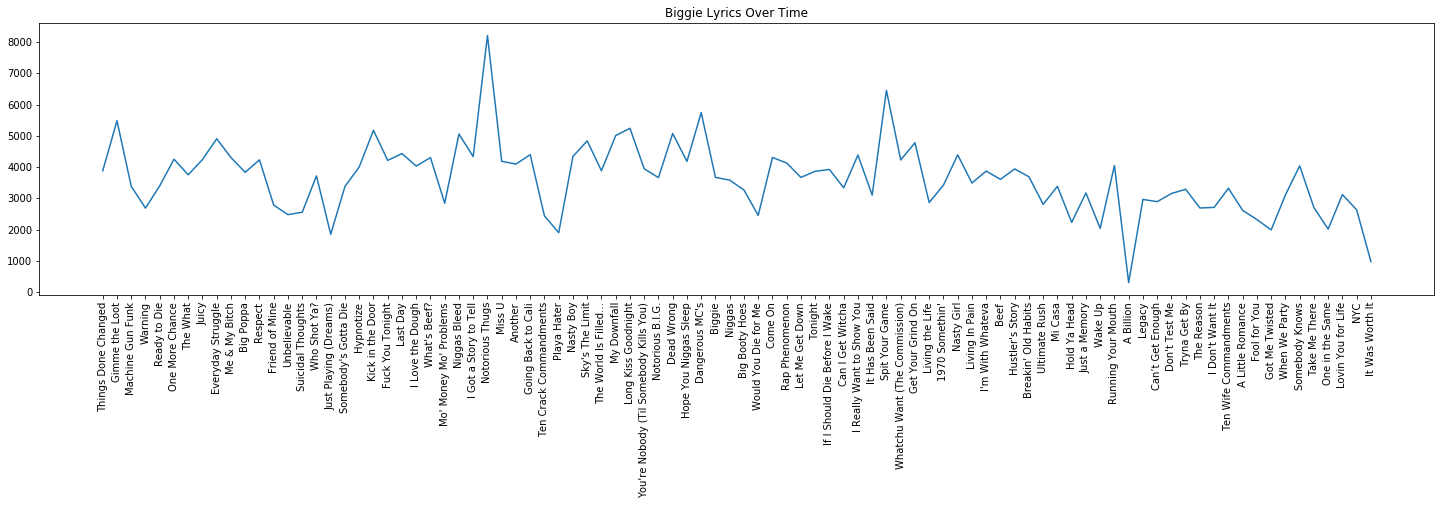

In [76]:
fig=plt.figure(figsize=(25, 5))

plt.plot(df_biggie['track'], df_biggie['lyrics'].apply(lambda x: len(x)))

plt.title("Biggie Lyrics Over Time")
plt.suptitle("")
plt.ylabel('')
plt.xticks(rotation=90)
plt.xlabel('')



Text(0.5, 0, '')

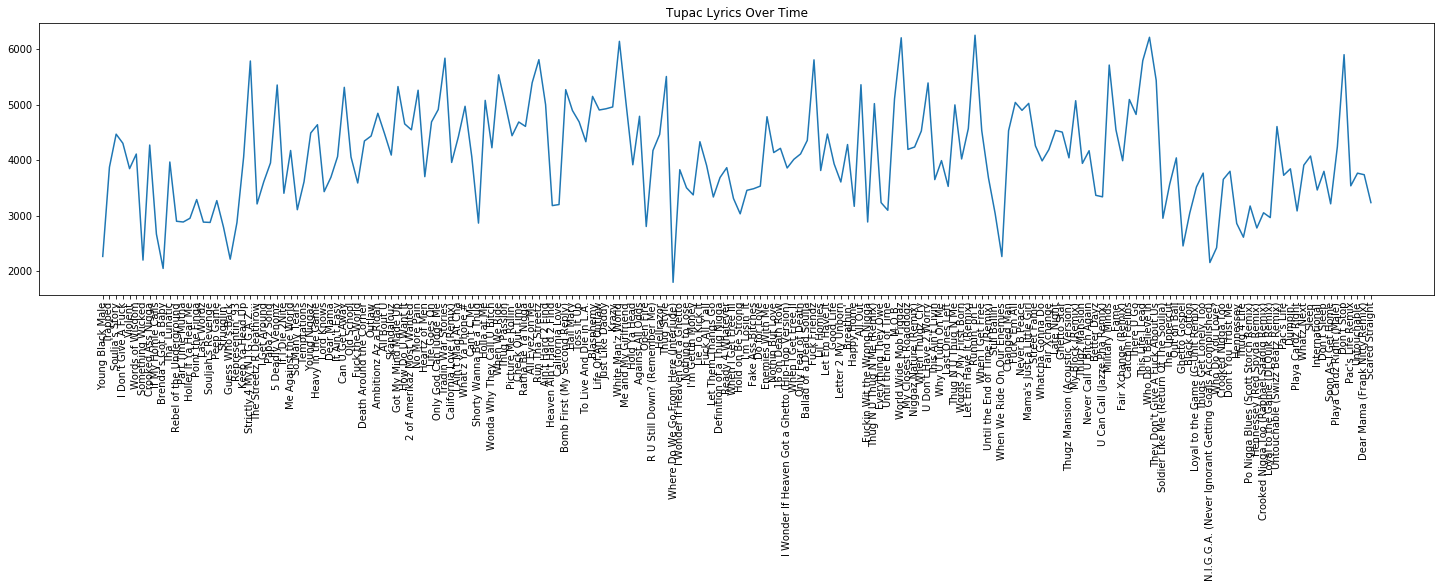

In [77]:
fig=plt.figure(figsize=(25,5))

plt.plot(df_tupac['track'], df_tupac['lyrics'].apply(lambda x: len(x)))

plt.title("Tupac Lyrics Over Time")
plt.suptitle("")
plt.ylabel('')
plt.xticks(rotation=90)
plt.xlabel('')

In [78]:
df_tupac['new_lyrics'] = df_tupac['lyrics'].str.replace(r'\[[^[]*\]', '')  #this gets rid of []] and text inside it
df_biggie['new_lyrics'] = df_biggie['lyrics'].str.replace(r'\[[^[]*\]', '')


# df_biggie['new_lyrics'] = df_biggie['new_lyrics'].str.replace(r'\*[^)]*\*', '')

# (r'\[[^[]*\]', '')    brackets
# (r'\([^)]*\)', '')    paranthesis
# (r'\*[^*]*\)', '')    
#    \[  [^[] * \]

# df_all['new_lyrics'] = df_all['lyrics'].str.replace(r'\([^)]*\)', '')   #this gets rid of (paranthese) and text inside it
# df_all['new_lyrics'] = df_all['lyrics'].str.replace(r'\[.+\]', '')
# df_all['new_lyrics'] = df_all['lyrics'].str.replace(r'/\[([^\]]*)\]/', '')

In [79]:
# df_biggie['new_lyrics'] = df_biggie['new_lyrics'].str.replace(r'\*[^*]*\)', '')  

In [80]:
df_tupac['lyrics'][172]  #originally

'[Intro: 2Pac]\nNigga, fuck that gin and juice, I\'m fuckin\' with Hennessy\nJust pour me a glass of that dark shit\nThat\'s right\n\n[Chorus: 2Pac & Sleepy Brown]\nThey wanna knows my role model, it\'s in a brown bottle\nOoooh, ba-ba, ba-ba-dahhhhh\nHennessy (Hennessy) hahaha, yeah\nThey wanna knows my role model, it\'s in a brown bottle\nOoooh, ba-ba, ba-ba-dahhhhh\nHennessy (Hennessy)\n\n[Verse One: 2Pac]\nNow I was born in the gutter facin\' life or death\nI was a thug ever since my mama gave me breath\nThese motherfuckers wanna see me die\nSo who am I to try to warn \'em?\nI fuckin\' bomb \'em, them niggas fry\nHey, remember me? Down that Hennessy\nThe nigga you don\'t wanna see, let me proceed\nMy definition of some thug shit, y\'all don\'t hear me\nNow that it\'s poppin\', ain\'t no love, bitch\nI maintain in the game, in the gutter\'s where I still kick it\nI\'m tryna hustle up a meal ticket\nI\'m still wicked in my ways, a hustler \'til my dyin days\nAin\'t nuttin\' wrong with

In [81]:
df_tupac['new_lyrics'][0]

"\n(Hard like an erection)\nYoung black male\n(Hard like an erection)\nAin't shit to fool with\n(Hard like an erection)\nYoung black male\n(Hard like an erection)\nAin't shit to fool with\nYes, niggas! Yes, niggas! Yes, niggas!\nGo, nigga, go!\n(Hard like an erection)\nYoung black male\n(Hard like an erection)\nAin't shit to fool with\n(Hard like an erection)\nYoung black male\n(Hard like an erection)\nAin't shit to fool with\n\n\nYoung black male\nI try to effect by kicking the facts\nAnd stacking much mail\nI'm packing a gat 'cause guys wanna jack\nAnd fuck going to jail\n'Cause I ain't a crook, despite how I look\nI don't sell yayo\nThey judging a brother like covers on books\nFollow me into a flow\nI'm sure you know, which way to go\nI'm hitting 'em out of the doors\nSo slip on the slope, let's skip on the flow\nI'm fucking the sluts and hoes\nThe bigger the butts the tighter the clothes\nThe gimminy jimminy grows\nThen whaddaya know, it's off with some clothes\nRowd when the crowd

# Cleaning Lyrics, Removing Punctuations

In [82]:
df_tupac['new_lyrics'] = [re.sub('\n',' ', i) for i in df_tupac['new_lyrics']]
df_biggie['new_lyrics'] = [re.sub('\n',' ', i) for i in df_biggie['new_lyrics']]


In [83]:
df_tupac['new_lyrics'] = [re.sub('-',' ', i) for i in df_tupac['new_lyrics']]
df_tupac['new_lyrics'] = [re.sub(',','', i) for i in df_tupac['new_lyrics']]
df_tupac['new_lyrics'] = [re.sub('!','', i) for i in df_tupac['new_lyrics']]
df_tupac['new_lyrics'] = [re.sub("\'",'', i) for i in df_tupac['new_lyrics']]
df_tupac['new_lyrics'] = [re.sub("   ",' ', i) for i in df_tupac['new_lyrics']]
df_tupac['new_lyrics'] = [re.sub("  ",' ', i) for i in df_tupac['new_lyrics']]

# df_all['lyrics'] = [re.sub('\)','', i) for i in df_all['lyrics']]
# df_all['lyrics'] = [re.sub("\)",'', i) for i in df_all['lyrics']]


In [84]:
df_biggie['new_lyrics'] = [re.sub('-',' ', i) for i in df_biggie['new_lyrics']]
df_biggie['new_lyrics'] = [re.sub(',','', i) for i in df_biggie['new_lyrics']]
df_biggie['new_lyrics'] = [re.sub('!','', i) for i in df_biggie['new_lyrics']]
df_biggie['new_lyrics'] = [re.sub("\'",'', i) for i in df_biggie['new_lyrics']]
df_biggie['new_lyrics'] = [re.sub("   ",' ', i) for i in df_biggie['new_lyrics']]
df_biggie['new_lyrics'] = [re.sub("  ",' ', i) for i in df_biggie['new_lyrics']]

In [85]:
df_tupac.dtypes

level_0        int64
index          int64
album         object
year           int64
lyrics        object
track         object
artist        object
posthumous    object
new_lyrics    object
dtype: object

In [86]:
# df_tupac['lyrics'] = df_tupac['lyrics'].astype('|S500')

#  Removing *.,\/ (all symbols)

In [87]:


punc_lower = lambda x: x.lower()
strip = lambda x: x.strip()
no_per = lambda x: x.replace('.', '')
alphanumeric = lambda x: re.sub('\w*\d\w*', '', x)
# no_space = lambda x: re.sub('\s','', x)


df_tupac['new_lyrics'] = df_tupac.new_lyrics.map(punc_lower).map(no_per).map(strip).map(alphanumeric)

In [88]:
punc_lower = lambda x: x.lower()
strip = lambda x: x.strip()
no_per = lambda x: x.replace('.', '')
alphanumeric = lambda x: re.sub('\w*\d\w*', '', x)
# no_space = lambda x: re.sub('\s','', x)


df_biggie['new_lyrics'] = df_biggie.new_lyrics.map(punc_lower).map(no_per).map(strip).map(alphanumeric)

In [89]:
# df_biggie['new_lyrics2'] = df_biggie['new_lyrics'].str.replace(r'\*[^)]*\*', '')

In [90]:
#Removing excess spaces
df_tupac['new_lyrics'] = [re.sub("       ",' ', i) for i in df_tupac['new_lyrics']]
df_biggie['new_lyrics'] = [re.sub("       ",' ', i) for i in df_biggie['new_lyrics']]

In [91]:
df_biggie['new_lyrics'][0]

'back in the day things done changed on this side remember they used to thump but now they blast right back in the day things done changed on this side remember they used to thump but now they blast right back in the day things done changed on this side remember they used to thump but now they blast right back in the day things done changed on this side remember they used to thump but now they blast right remember back in the days when niggas had waves gazelle shades and corn braids pitching pennies honeys had the high top jellies shooting skelly motherfuckers was all friendly lounging at the barbecues drinking brews with the neighborhood crews hanging on the avenues turn your pages to  niggas is getting smoked g: believe me talk slick you get your neck slit quick cause real street niggas aint having that shit toting tecs for rep smoking blunts in the project hallways shooting dice all day wait for niggas to step up on some fighting shit we get hype and shit and start lighting shit so 

\[  [^[] * \]     #regex code that gets rid of [text] text inside brackets
\[.+\]  
  
(r'\*[]\)  
  
\( [^)] * \ )

# EDA FOR LENGTH OF LYRICS

In [237]:
df_tupac['length_lyrics']  = df_tupac['new_lyrics'].str.len()
df_biggie['length_lyrics']  = df_biggie['new_lyrics'].str.len()


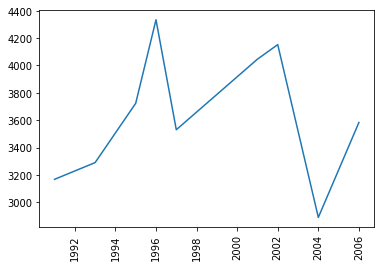

In [279]:
example=df_tupac.groupby('year')['length_lyrics'].mean()
example2=df_biggie.groupby('year')['album','length_lyrics'].mean()


plt.title('')
plt.xlabel('', rotation = 90)
plt.ylabel('')
plt.xticks(rotation=90)

plt.plot(example);

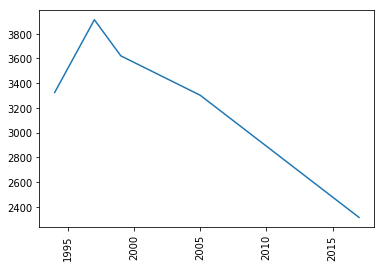

In [280]:
example=df_biggie.groupby('year')['length_lyrics'].mean()


plt.title('Biggie Average Lyrics by Song')
plt.xlabel('', rotation = 90)
plt.ylabel('')
plt.xticks(rotation=90)

plt.plot(example);

In [92]:
# word_tokenize(df_all['lyrics'])

In [93]:
#Getting rid of text inside the () or []
# regex = re.compile("[]")
# result = re.findall(regex, mystring)

# Count Vectorization

In [94]:
corpus_tupac = df_tupac.new_lyrics
corpus_biggie = df_biggie.new_lyrics

In [95]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [243]:
from nltk.corpus import stopwords
stoplist = set(nltk.corpus.stopwords.words('english'))
new_stopwords = ['im', 'got', 'like', 'ya', 'let', 'get', 'niggas', 'nigga']
new_stopwords_list = stoplist.union(new_stopwords) 

## Tupac Count Vectorization 

In [244]:

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words=new_stopwords_list)
X=cv.fit_transform(corpus_tupac).toarray()
df_tupac_count  = pd.DataFrame(X, columns=cv.get_feature_names(), index = df_tupac['track'])

## Biggie Count Vectorization

In [245]:
cv = CountVectorizer(stop_words=new_stopwords_list, max_df = 0.3)
X=cv.fit_transform(corpus_biggie).toarray()
df_biggie_count  = pd.DataFrame(X, columns=cv.get_feature_names(), index = df_biggie['track'])

In [246]:
df_tupac_count.head()


,abandon,abandoned,able,aborted,abortions,absolutely,abu,abuse,abused,ac,...,zig,zigga,zines,zipped,zodiac,zone,zoo,zoot,zow,zulu
track,,,,,,,,,,,,,,,,,,,,,
Young Black Male,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Trapped,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Soulja's Story,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
I Don't Give A Fuck,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Violent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [247]:
df_tupac_count.shape

(190, 7233)

In [248]:
df_tupac_count.sum().sort_values(ascending = False)

dont          770
aint          757
cause         693
see           651
know          599
fuck          561
thug          521
life          498
time          467
shit          458
go            374
cant          372
die           363
em            351
wanna         350
one           344
thats         339
love          325
never         319
back          317
baby          317
make          313
bitch         311
man           304
ass           280
still         279
way           275
tell          269
keep          266
gettin        264
             ... 
minell          1
minded          1
mimickin        1
milla           1
militant        1
milita          1
mil             1
mighty          1
mighta          1
midwest         1
midnight        1
mics            1
michelob        1
michelle        1
micheal         1
miami           1
meyeah          1
methods         1
meth            1
mes             1
mentally        1
mentallity      1
members         1
melons          1
melle     

In [249]:
df_biggie_count.sum().sort_values(ascending = False)

motherfuckers    116
bad              108
going            100
cmon              93
nasty             87
ill               87
whatchu           86
uhh               79
beef              73
fucking           73
us                70
lets              69
another           68
live              66
gotta             66
cali              66
funk              66
ride              65
oh                63
pray              61
girl              60
good              60
ready             58
dead              58
bone              57
boy               57
grab              54
show              52
gonna             51
whats             50
                ... 
jim                1
jiggas             1
jus                1
kaanah             1
taisha             1
kani               1
killa              1
tallahassee        1
kidney             1
talons             1
kicker             1
tammy              1
kibbitz            1
khan               1
keyshia            1
kettle             1
kerosene     

# TFIDF Vector

## Tupac 

In [250]:
from sklearn.feature_extraction.text import TfidfVectorizer


cv_tfidf_tupac = TfidfVectorizer(stop_words=new_stopwords_list)

X_tfidf_tupac = cv_tfidf_tupac.fit_transform(corpus_tupac).toarray()

df_tfidf_tupac = pd.DataFrame(X_tfidf_tupac, columns= cv_tfidf_tupac.get_feature_names(), index = df_tupac['track'])



## Biggie

In [251]:
cv_tfidf_biggie = TfidfVectorizer(stop_words=new_stopwords_list)

X_tfidf_biggie = cv_tfidf_biggie.fit_transform(corpus_biggie).toarray()

df_tfidf_biggie = pd.DataFrame(X_tfidf_biggie, columns= cv_tfidf_biggie.get_feature_names(), index = df_biggie['track'])


In [252]:
df_tfidf_tupac.head()

,abandon,abandoned,able,aborted,abortions,absolutely,abu,abuse,abused,ac,...,zig,zigga,zines,zipped,zodiac,zone,zoo,zoot,zow,zulu
track,,,,,,,,,,,,,,,,,,,,,
Young Black Male,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Trapped,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Soulja's Story,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I Don't Give A Fuck,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Violent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Tupac

In [254]:
df_tfidf_tupac.sum().sort_values(ascending = False)




dont             7.759131
aint             7.319458
fuck             7.286620
cause            6.703743
thug             6.698824
see              6.508579
know             6.346800
life             5.895875
shit             5.290080
time             5.247691
em               5.134846
die              5.015694
go               4.978728
baby             4.763573
cant             4.672742
wanna            4.433154
one              4.284063
motherfuckers    4.263558
bitch            4.169797
love             4.117524
thats            4.068524
man              3.990231
ass              3.933776
make             3.916196
back             3.874544
money            3.872862
yeah             3.838693
still            3.815835
never            3.770129
gotta            3.760020
                   ...   
exit             0.021422
anorexic         0.021422
ducking          0.021422
forward          0.021422
jackass          0.021422
warden           0.021422
blaming          0.021422
boat        

## Biggie

In [255]:
df_tfidf_biggie.sum().sort_values(ascending = False)


shit             4.108969
dont             4.062244
know             4.048869
bitch            3.588094
aint             3.089940
see              2.829472
yo               2.754697
fuck             2.749140
biggie           2.745742
come             2.722603
love             2.640452
big              2.623323
cause            2.475248
one              2.464969
baby             2.417984
wanna            2.372916
back             2.363057
motherfuckers    2.319023
em               2.299165
want             2.260696
thats            2.246366
die              2.241888
man              2.217927
youre            2.187250
cant             2.083715
take             2.064136
time             2.048848
yeah             2.043222
make             1.989921
yall             1.969754
                   ...   
vuitton          0.012345
damien           0.012345
soloist          0.012345
fiction          0.012345
stripped         0.012345
armstrong        0.012345
stickin          0.012345
sticked     

# NMF Tupac

In [256]:
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

nmf_model = NMF(5)
doc_topic = nmf_model.fit_transform(X_tfidf_tupac)

In [257]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_0","component_1", "component_2", "component_3","component_4"],
             columns = cv_tfidf_tupac.get_feature_names())
topic_word

,abandon,abandoned,able,aborted,abortions,absolutely,abu,abuse,abused,ac,...,zig,zigga,zines,zipped,zodiac,zone,zoo,zoot,zow,zulu
component_0,0.002,0.005,0.001,0.003,0.000,0.0,0.003,0.002,0.001,0.001,...,0.001,0.004,0.006,0.005,0.001,0.015,0.001,0.004,0.003,0.000
component_1,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,...,0.002,0.000,0.000,0.000,0.001,0.000,0.001,0.000,0.002,0.000
component_2,0.001,0.005,0.008,0.000,0.004,0.0,0.004,0.001,0.001,0.000,...,0.001,0.000,0.000,0.001,0.000,0.011,0.000,0.000,0.000,0.003
component_3,0.001,0.000,0.000,0.000,0.000,0.0,0.000,0.001,0.001,0.000,...,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_4,0.000,0.001,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.002,...,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [258]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [259]:
display_topics(nmf_model, cv_tfidf_tupac.get_feature_names(), 15)
#topic 0 = neg sentiment
#1 = love/romance
#2 = romance? 


Topic  0
fuck, em, motherfuckers, dont, shit, die, see, aint, ass, life, cause, bitch, ride, bitches, motherfucker

Topic  1
thug, maybe, lot, hold, baby, lady, passion, girl, yeah, need, give, wanna, want, lovin, call

Topic  2
time, away, dont, world, mama, know, aint, love, end, baby, home, cause, go, happy, ill

Topic  3
heaven, ghetto, wonder, death, black, fear, peace, lord, life, die, whupped, shit, reincarnated, mo, street

Topic  4
shake, city, la, california, party, knows, cali, compton, watts, rocking, uh, rockin, baby, west, ol


In [260]:
doc_top = pd.DataFrame(doc_topic.round(5),
             index = df_tupac['track'],
             columns = ["component_0","component_1", "component_2", "component_3","component_4" ])
doc_top.head(100)

,component_0,component_1,component_2,component_3,component_4
track,,,,,
Young Black Male,0.09126,0.00000,0.05336,0.01163,0.00060
Trapped,0.06346,0.00000,0.13606,0.01109,0.06489
Soulja's Story,0.04083,0.00000,0.00932,0.04343,0.00000
I Don't Give A Fuck,0.21995,0.00000,0.02638,0.00005,0.00205
Violent,0.12896,0.00000,0.07839,0.00000,0.00000
Words of Wisdom,0.02565,0.00000,0.10696,0.00562,0.00000
Something Wicked,0.03617,0.00000,0.00595,0.00000,0.00000
Crooked Ass Nigga,0.10664,0.00000,0.00000,0.00482,0.00000
If My Homie Calls,0.03286,0.00000,0.16684,0.00000,0.02388


In [261]:
doc_top.idxmax()

component_0                                         Fuck 'Em All
component_1                           Thug N U Thug N Me (Remix)
component_2                        Dear Mama (Frank Nitty Remix)
component_3    I Wonder If Heaven Got a Ghetto (Hip-Hop Version)
component_4                                      California Love
dtype: object

# NMF Biggie

In [262]:
nmf_model = NMF(4)
doc_topic = nmf_model.fit_transform(X_tfidf_biggie)

In [263]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_0","component_1", "component_2", 'component_3'],
             columns = cv_tfidf_biggie.get_feature_names())
topic_word

,ab,abandon,abandoned,abduct,able,abortion,absent,absolutely,absorb,abuser,...,yummy,yup,zee,zero,zhane,zhite,zip,zone,zus,zy
component_0,0.018,0.003,0.006,0.004,0.017,0.017,0.006,0.002,0.005,0.007,...,0.001,0.002,0.019,0.002,0.000,0.01,0.004,0.011,0.004,0.004
component_1,0.000,0.003,0.001,0.002,0.000,0.000,0.000,0.002,0.000,0.000,...,0.000,0.013,0.000,0.005,0.000,0.00,0.000,0.000,0.005,0.002
component_2,0.011,0.002,0.000,0.002,0.000,0.000,0.000,0.003,0.000,0.002,...,0.000,0.000,0.000,0.003,0.009,0.00,0.001,0.003,0.000,0.002
component_3,0.003,0.000,0.000,0.000,0.002,0.000,0.000,0.000,0.002,0.000,...,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000


In [264]:
display_topics(nmf_model, cv_tfidf_biggie.get_feature_names(), 15)


Topic  0
dont, know, baby, youre, aint, love, cause, see, big, shit, cant, wanna, never, time, take

Topic  1
motherfuckers, come, ready, biggie, die, funk, yes, proceed, shit, grab, bone, pray, coast, one, lets

Topic  2
bitch, hoes, shit, nasty, fucking, another, yo, fuck, dick, know, ass, dee, aint, oh, bitches

Topic  3
beef, ha, icu, whats, guaranteed, pow, yall, shit, em, check, bad, jeep, dont, safe, see


In [265]:
doc_top = pd.DataFrame(doc_topic.round(5),
             index = df_biggie['track'],
             columns = ["component_0","component_1", "component_2", "component_3"])
doc_top.head(50)

,component_0,component_1,component_2,component_3
track,,,,
Things Done Changed,0.12062,0.03019,0.00000,0.00000
Gimme the Loot,0.03436,0.06133,0.06835,0.07875
Machine Gun Funk,0.01735,0.17491,0.00000,0.00000
Warning,0.12378,0.09159,0.00000,0.02483
Ready to Die,0.00000,0.47343,0.00000,0.00000
One More Chance,0.06370,0.09464,0.30287,0.00000
The What,0.04930,0.12284,0.24695,0.01771
Juicy,0.23908,0.00000,0.00000,0.02807
Everyday Struggle,0.10227,0.00000,0.13552,0.00000


In [266]:
doc_top.idxmax()

component_0       The Reason
component_1          Come On
component_2    Me & My Bitch
component_3             Beef
dtype: object

In [119]:
sammy = {'username': 'sammy-shark', 'online': True, 'followers': 987}
jesse = {'username': 'JOctopus', 'online': False, 'points': 723}

In [120]:
for common_key in sammy.keys() & jesse.keys():
    print(sammy[common_key], jesse[common_key])

sammy-shark JOctopus
True False


In [121]:
print(sammy.values())


dict_values(['sammy-shark', True, 987])
